In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import os
import pandas as pd
import numpy as np


dir = "./分词/"
tokenized_filenames = os.listdir(dir)
# print(tokenized_filenames)

articals = []
for file in tokenized_filenames:
  with open(dir+file, mode='r',encoding='utf-8') as f:
    chapter_words = []
    for line in f.readlines():
      line = line.replace('\n','')
      chapter_words += line.split(" ")

    chapter_pair = {}
    chapter_pair[file] = " ".join(chapter_words)
    articals.append(chapter_pair)
    chapter_words = []
    
# keys = [list(keys)[0] for keys in (item.keys() for item in articals)]
# print(keys)
tf_vectorizer = CountVectorizer(max_features=10000)
articals_list = [list(values)[0] for values in (item.values() for item in articals)]
# print(articals_list[0])
tf = tf_vectorizer.fit_transform(articals_list)

# print(tf_vectorizer.get_feature_names()[400:420])
# print(tf.toarray()[20:50,200:800])

n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=25,learning_method='online',learning_offset=50.,random_state=0)
lda.fit(tf)
chapter_top = pd.DataFrame(lda.transform(tf),columns=np.arange(n_topics)+1)
print(chapter_top)
print(chapter_top.shape)


            1         2         3         4         5
0    0.930090  0.000220  0.000220  0.000220  0.069250
1    0.971276  0.000216  0.000216  0.000216  0.028076
2    0.999015  0.000245  0.000245  0.000245  0.000250
3    0.153041  0.000190  0.000190  0.000190  0.846390
4    0.999086  0.000227  0.000227  0.000227  0.000232
..        ...       ...       ...       ...       ...
157  0.999101  0.000224  0.000224  0.000224  0.000228
158  0.999054  0.000236  0.000236  0.000236  0.000239
159  0.810180  0.000197  0.000197  0.000197  0.189230
160  0.999118  0.000220  0.000220  0.000220  0.000222
161  0.999258  0.000184  0.000184  0.000184  0.000189

[162 rows x 5 columns]
(162, 5)


In [46]:
print(chapter_top)
# chapter_top.apply(sum, axis=1).values
# chapter_top.apply(max,axis=1).values
np.where(chapter_top >= np.min(chapter_top.apply(max, axis=1)))

            1         2         3         4         5
0    0.930090  0.000220  0.000220  0.000220  0.069250
1    0.971276  0.000216  0.000216  0.000216  0.028076
2    0.999015  0.000245  0.000245  0.000245  0.000250
3    0.153041  0.000190  0.000190  0.000190  0.846390
4    0.999086  0.000227  0.000227  0.000227  0.000232
..        ...       ...       ...       ...       ...
157  0.999101  0.000224  0.000224  0.000224  0.000228
158  0.999054  0.000236  0.000236  0.000236  0.000239
159  0.810180  0.000197  0.000197  0.000197  0.189230
160  0.999118  0.000220  0.000220  0.000220  0.000222
161  0.999258  0.000184  0.000184  0.000184  0.000189

[162 rows x 5 columns]


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161], dtype=int64),
 array([0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

C:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


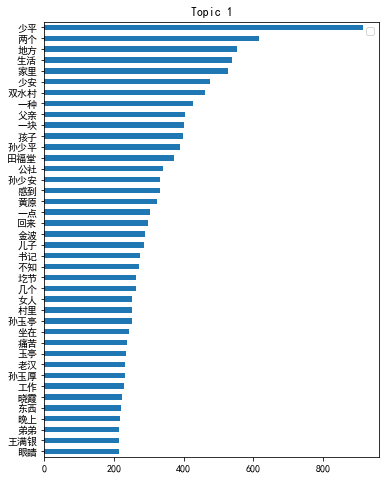

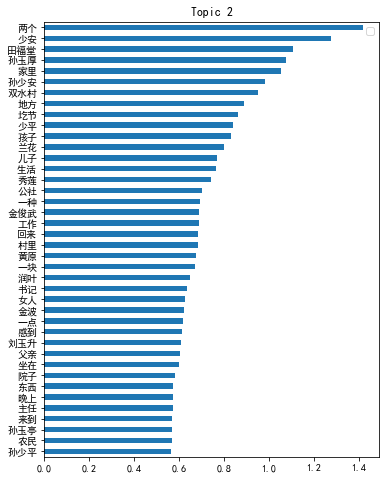

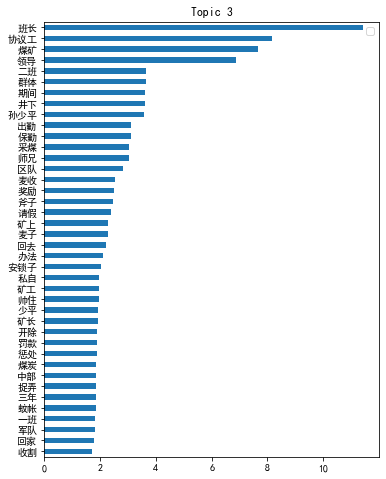

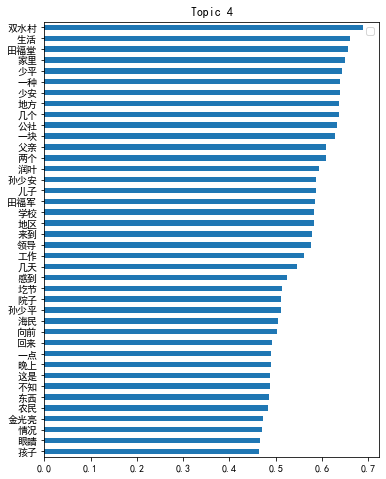

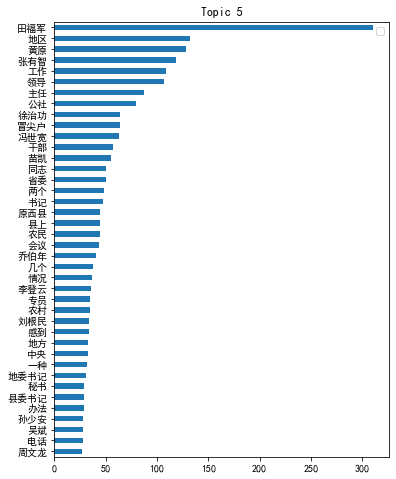

In [48]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

n_top_words = 40
tf_feature_names = tf_vectorizer.get_feature_names()
for topic_id, topic in enumerate(lda.components_):
  topword = pd.DataFrame(
    {
      "word" : [tf_feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]],
      "componets" : topic[topic.argsort()[:-n_top_words-1:-1]]
    }
  )
  topword.sort_values(by="componets").plot(kind="barh",x="word",y="componets",figsize=(6,8),legend=False)
  plt.yticks(size=10)
  plt.ylabel("")
  plt.legend("")
  plt.title("Topic %d" %(topic_id+1))
  plt.show()




In [49]:
def print_top_words(model, feature_names, n_top_words):
  for topic_id,top in enumerate(model.components_):
    print('\nTopic Nr.%d:' % int(topic_id+1))
    print("".join([feature_names[i] + ' ' + str(round(topic[i],2)) + ' | ' for i in topic.argsort()[:-n_top_words-1:-1]]))
    
n_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda,tf_feature_names,n_top_words)
    


Topic Nr.1:
田福军 310.4 | 地区 132.3 | 黄原 128.44 | 张有智 118.1 | 工作 108.73 | 领导 106.93 | 主任 87.6 | 公社 79.8 | 徐治功 64.01 | 冒尖户 63.81 | 

Topic Nr.2:
田福军 310.4 | 地区 132.3 | 黄原 128.44 | 张有智 118.1 | 工作 108.73 | 领导 106.93 | 主任 87.6 | 公社 79.8 | 徐治功 64.01 | 冒尖户 63.81 | 

Topic Nr.3:
田福军 310.4 | 地区 132.3 | 黄原 128.44 | 张有智 118.1 | 工作 108.73 | 领导 106.93 | 主任 87.6 | 公社 79.8 | 徐治功 64.01 | 冒尖户 63.81 | 

Topic Nr.4:
田福军 310.4 | 地区 132.3 | 黄原 128.44 | 张有智 118.1 | 工作 108.73 | 领导 106.93 | 主任 87.6 | 公社 79.8 | 徐治功 64.01 | 冒尖户 63.81 | 

Topic Nr.5:
田福军 310.4 | 地区 132.3 | 黄原 128.44 | 张有智 118.1 | 工作 108.73 | 领导 106.93 | 主任 87.6 | 公社 79.8 | 徐治功 64.01 | 冒尖户 63.81 | 


C:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
### compose chapter
for name in names:
  print(names)

NameError: name 'names' is not defined